In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### LOAD RANDOM CATALOG ###########################
# beta  = 1.0
# nrand = 1.0
# RandoCat name: 60.cat
# Obs. catalog: v300.dat --> v_circmax = 300 km/s

OBS_CAT = np.loadtxt("observed_catalogs/v300.dat")
RND_CAT = np.loadtxt("random_catalogs/60.cat")
BETASKEL = np.loadtxt("xdl_beta_skeleton/60.BSKIndex")
FULLCAT = np.loadtxt("full_catalogs/60.cat")
VOIDPARTLIST = np.loadtxt("./masterlists/60.mls")

In [3]:
beta = 1.0
nrand = 1.0

z0 = 0      # Mpc/h
deltaz = 20 # Mpc/h

In [4]:
Xobs, Yobs, Zobs = OBS_CAT[:,0], OBS_CAT[:,1], OBS_CAT[:,2]
index_o = np.where( abs(Zobs - z0)< deltaz/2.)
x_o, y_o, z_o = Xobs[index_o], Yobs[index_o], Zobs[index_o]

Xrnd, Yrnd, Zrnd = RND_CAT[:,0], RND_CAT[:,1], RND_CAT[:,2]
index_r = np.where( abs(Zrnd - z0) < deltaz/2.0)
x_r, y_r, z_r = Xrnd[index_r], Yrnd[index_r], Zrnd[index_r]

In [5]:
x_min, x_max = 0, 200
y_min, y_max = 0, 200

In [6]:
!mkdir figures/cocoa

mkdir: cannot create directory ‘figures/cocoa’: File exists


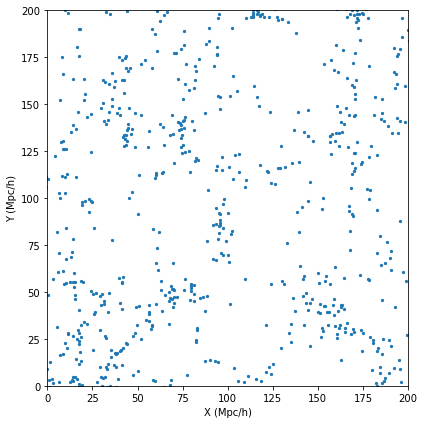

In [7]:
fig = plt.figure(figsize=(6,6))
plt.scatter(x_o, y_o, s=5)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("X (Mpc/h)")
plt.ylabel("Y (Mpc/h)")

plt.tight_layout()
plt.savefig("./figures/cocoa/00_slice.pdf")

In [9]:
N_halos = int(Xobs.shape[0])

In [10]:
a = BETASKEL[:,0].astype(int)
a = list(a)
b = BETASKEL[:,1].astype(int)
b = list(b)

c = []
c.extend(a)
c.extend(b)
d = []
d.extend(b)
d.extend(a)

c = np.array(c, dtype=int)
d = np.array(d, dtype=int)

fcBSkel = np.vstack((c,d)).T

In [11]:
index = np.where( (abs(FULLCAT[fcBSkel[:,0],2] - z0) < deltaz / 2.0) &
                  (FULLCAT[fcBSkel[:,0],0] > x_min) &
                  (FULLCAT[fcBSkel[:,0],0] < x_max) & 
                  (FULLCAT[fcBSkel[:,0],1] > y_min) &
                  (FULLCAT[fcBSkel[:,0],1] < y_max))[0]

X ,  Y = FULLCAT[fcBSkel[index,0],0], FULLCAT[fcBSkel[index,0],1]
X1, Y1 = FULLCAT[fcBSkel[index,1],0], FULLCAT[fcBSkel[index,1],1]

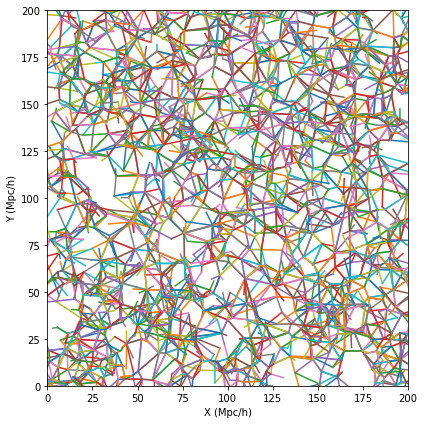

In [12]:
fig = plt.figure(figsize=(6,6))
for i in range( int(index.shape[0])):
    plt.plot([X[i],X1[i]], [Y[i],Y1[i]])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("X (Mpc/h)")
plt.ylabel("Y (Mpc/h)")

plt.tight_layout()
plt.savefig("./figures/cocoa/02_slice-beta-skeleton.pdf")

In [15]:
void_id_p, x_p, y_p, z_p = VOIDPARTLIST[:,0], VOIDPARTLIST[:,1],  VOIDPARTLIST[:,2],  VOIDPARTLIST[:,3] 

index_p = np.where((abs(VOIDPARTLIST[:,3] - z0) < deltaz / 2.0) &
                   (VOIDPARTLIST[:,1] > x_min) & 
                   (VOIDPARTLIST[:,1] < x_max) & 
                   (VOIDPARTLIST[:,2] > y_min) & 
                   (VOIDPARTLIST[:,2] < y_max) )[0]

N_voids_in_frame = VOIDPARTLIST[:,0].max()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

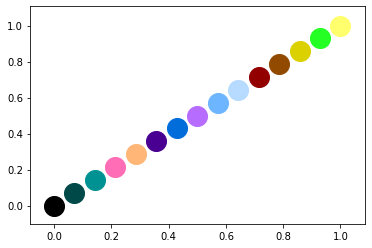

In [19]:
#https://www.somersault1824.com/tips-for-designing-scientific-figures-for-color-blind-readers/

color01 = np.array([  0,   0,   0, 255])/255.
color02 = np.array([  0,  73,  73, 255])/255.
color03 = np.array([  0, 146, 146, 255])/255.
color04 = np.array([255, 109, 182, 255])/255.
color05 = np.array([255, 182, 119, 255])/255.
color06 = np.array([ 73,   0, 146, 255])/255.
color07 = np.array([  0, 109, 219, 255])/255.
color08 = np.array([182, 109, 255, 255])/255.
color09 = np.array([109, 182, 255, 255])/255.
color10 = np.array([182, 219, 255, 255])/255.
color11 = np.array([146,   0,   0, 255])/255.
color12 = np.array([146,  73,   0, 255])/255.
color13 = np.array([219, 209,   0, 255])/255.
color14 = np.array([ 36, 255,  36, 255])/255.
color15 = np.array([255, 255, 109, 255])/255.


colours=[color01, color02, color03, color04, color05, color06, color07, color08, color09,
        color10, color11, color12, color13, color14, color15]

colours = np.array(colours)

x = np.linspace(0,1,15)

for i in range(15):
    plt.scatter(x[i],x[i], s=400, c=colours[i])

In [20]:
x.shape

(15,)

In [21]:
index_oo = np.where( (fcBSkel[index,0] >= N_halos) &  (fcBSkel[index,1] >= N_halos) )
index_rr = np.where( (fcBSkel[index,0]  < N_halos) &  (fcBSkel[index,1]  < N_halos) )

In [22]:
index_rr

(array([   0,    1,    2, ..., 6015, 6016, 6020]),)

In [23]:
fcBSkel[index[index_rr]]

array([[   174, 201134],
       [   174, 253257],
       [   174, 128112],
       ...,
       [268529, 258698],
       [265822, 258986],
       [269718, 260757]])

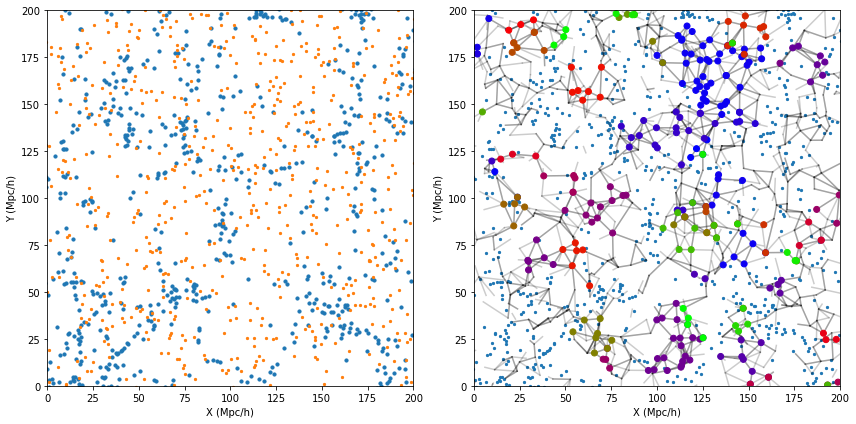

In [39]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121)
ax1.scatter(x_o, y_o, s=10)
ax1.scatter(x_r, y_r, s=5)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_xlabel("X (Mpc/h)")
ax1.set_ylabel("Y (Mpc/h)")


ax2=fig.add_subplot(122)
ax2.scatter(x_o, y_o, s=5)
# Random-Random connections
color = "black"
alpha = 0.2
for i in index_rr:
    ax2.plot([FULLCAT[fcBSkel[index[i],0],0], FULLCAT[fcBSkel[index[i],1],0]], 
             [FULLCAT[fcBSkel[index[i],0],1], FULLCAT[fcBSkel[index[i],1],1]],
         c=color, alpha=alpha, zorder=1)


ax2.scatter(x_p[index_p], y_p[index_p], 
            c=(void_id_p[index_p]/N_voids_in_frame), 
            cmap=cmap, zorder=2)
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)
ax2.set_xlabel("X (Mpc/h)")
ax2.set_ylabel("Y (Mpc/h)")

plt.tight_layout()
plt.savefig("./figures/cocoa/03_slice-void-points.pdf")

In [25]:
index_rr

(array([   0,    1,    2, ..., 6015, 6016, 6020]),)

In [26]:
index_oo

(array([2594, 2595, 2596, ..., 6989, 6990, 6991]),)

In [27]:
# Remember, index_oo and index_rr are respect to "index"
included = np.hstack([index_rr[0], index_oo[0]])

In [28]:
included

array([   0,    1,    2, ..., 6989, 6990, 6991])

In [29]:
included.shape

(4099,)

In [30]:
not_included = list(set(range(index.shape[0])).difference(set(included)))

Text(0, 0.5, 'Y (Mpc/h)')

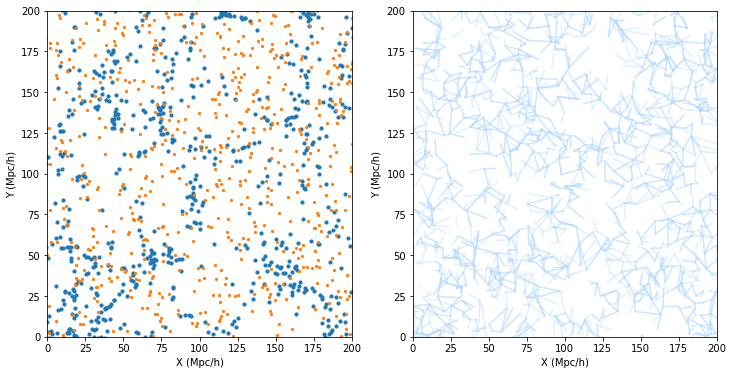

In [31]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121)
ax1.scatter(x_o, y_o, s=10)
ax1.scatter(x_r, y_r, s=5)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_xlabel("X (Mpc/h)")
ax1.set_ylabel("Y (Mpc/h)")


ax2=fig.add_subplot(122)

color = color10
alpha = 0.4
for i in not_included:
    ax2.plot([FULLCAT[fcBSkel[index[i],0],0], FULLCAT[fcBSkel[index[i],1],0]], 
             [FULLCAT[fcBSkel[index[i],0],1], FULLCAT[fcBSkel[index[i],1],1]],
         c=color, alpha=alpha, zorder=1)

ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)
ax2.set_xlabel("X (Mpc/h)")
ax2.set_ylabel("Y (Mpc/h)")    

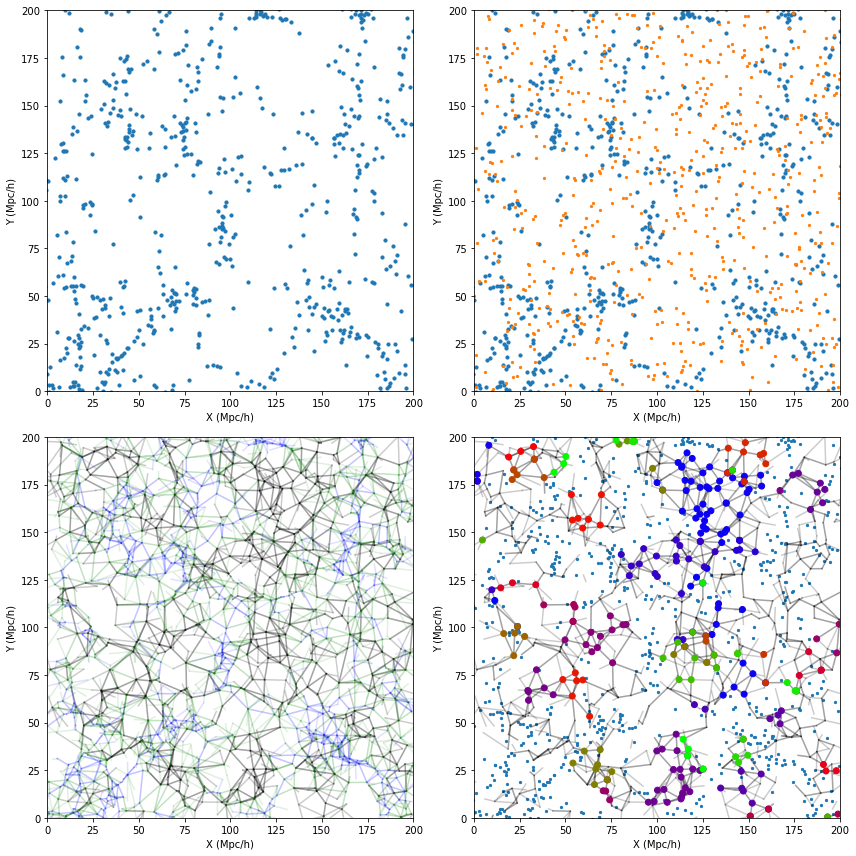

In [38]:
fig = plt.figure(figsize=(12,12))

# Dataset
ax1 = fig.add_subplot(221)
ax1.scatter(x_o, y_o, s=10)
#ax1.scatter(x_r, y_r, s=5)
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_xlabel("X (Mpc/h)")
ax1.set_ylabel("Y (Mpc/h)")

# Full Catalog: Dataset + Random Points
ax2=fig.add_subplot(222)
ax2.scatter(x_o, y_o, s=10)
ax2.scatter(x_r, y_r, s=5)
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)
ax2.set_xlabel("X (Mpc/h)")
ax2.set_ylabel("Y (Mpc/h)")

# Beta Skeleton
ax3=fig.add_subplot(223)
# Random-Random connections
color = "black"
alpha = 0.2
for i in index_rr:
    ax3.plot([FULLCAT[fcBSkel[index[i],0],0], FULLCAT[fcBSkel[index[i],1],0]], 
             [FULLCAT[fcBSkel[index[i],0],1], FULLCAT[fcBSkel[index[i],1],1]],
         c=color, alpha=alpha, zorder=1)
# Observed-Observed connections
color = "b"
alpha = 0.12
for i in index_oo:
    ax3.plot([FULLCAT[fcBSkel[index[i],0],0], FULLCAT[fcBSkel[index[i],1],0]], 
             [FULLCAT[fcBSkel[index[i],0],1], FULLCAT[fcBSkel[index[i],1],1]],
         c=color, alpha=alpha, zorder=1)
# Random-Observed connections
color = "g"
alpha = 0.12
for i in not_included:
    ax3.plot([FULLCAT[fcBSkel[index[i],0],0], FULLCAT[fcBSkel[index[i],1],0]], 
             [FULLCAT[fcBSkel[index[i],0],1], FULLCAT[fcBSkel[index[i],1],1]],
         c=color, alpha=alpha, zorder=1)    
ax3.set_xlim(x_min, x_max)
ax3.set_ylim(y_min, y_max)
ax3.set_xlabel("X (Mpc/h)")
ax3.set_ylabel("Y (Mpc/h)")

# Void Points and their Skeleton
ax4=fig.add_subplot(224)
ax4.scatter(x_o, y_o, s=5)
# Random-Random connections
color = "black"
alpha = 0.2
for i in index_rr:
    ax4.plot([FULLCAT[fcBSkel[index[i],0],0], FULLCAT[fcBSkel[index[i],1],0]], 
             [FULLCAT[fcBSkel[index[i],0],1], FULLCAT[fcBSkel[index[i],1],1]],
         c=color, alpha=alpha, zorder=1)
ax4.scatter(x_p[index_p], y_p[index_p], 
            c=(void_id_p[index_p]/N_voids_in_frame), 
            cmap=cmap, zorder=2)
ax4.set_xlim(x_min, x_max)
ax4.set_ylim(y_min, y_max)
ax4.set_xlabel("X (Mpc/h)")
ax4.set_ylabel("Y (Mpc/h)")


plt.tight_layout()
plt.savefig("./figures/explaining_the_method.pdf")